<h1><center>Physique numérique (PHY-3500)</center></h1>
<h1><center>TP4 - Équations différentielles partielles</center></h1>

## Nom des membres de l'équipe:

### Nom, Prénom :  NI 
### Légaré, Ophélie : 111 182 608
### Parrot, Anaïs : 111 184 980
### Turgeon, David : 111 182 265

### Importation des modules :

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cst

# L'équation de Schrödinger et la méthode de Crank-Nicolson

## Introduction

La résolution de l'équation de Schrödinger dépendante du temps en une dimension permet de trouver la fonction d'onde d'une particule dans une boîte ayant des parois impénétrables, donc sans potentiel.
$$\frac{-\hbar^2}{2 M} \frac{\partial^2 \psi}{\partial x^2} = i \hbar \frac{\partial \psi}{\partial t}$$

La méthode de Crank-Nicolson permet de résoudre cette équation différentielle partielle et d'obtenir une solution numérique stable dont la solution est 
$$\psi(x, t+h) = \psi(x, t) + h \frac{i \hbar}{4 m a^2} \left[\psi(x+a, t) + \psi(x-a, t) -2\psi(x,t) \right].$$
Sa forme compacte est $A \psi(t+h) = B \psi(t)$, où $A$ et $B$ sont deux matrices symétriques et tridiagonales.

Dans cette étude, la méthode de Crank-Nicolson est employée pour calculer la fonction d'onde de l'électron dans une boîte unidimensionnelle de 10$^{-8}$ m pour un temps $h$ de 10$^{-18}$ seconde. On connaît la fonction d'onde de l'électron au temps initial, soit $$\psi(x, 0) = exp \left[-\frac{(x-x_0)^2}{2 \sigma^2} \right]e^{i \kappa x}$$

Puis, on pose que cette dernière est nulle aux parois de la boîte; à $x=0$ et à $x=L$. Par la suite, une animation est produite afin de visualiser l'évolution de cette fonction d'onde pour différents incréments temporels.

## Question 1
On divise la longueur de la boîte en 1000 tranches pour tout d'abord calculer le vecteur $v = B \psi$ à partir de la matrice tridiagonale $B$ définie précédemment. L'expression utilisée pour le calcul des éléments $v_i$ du vecteur $v$ provient du manuel de référence (Newman).

In [2]:
# Données initiales du problème 
M = 9.109e-31   # kg
L = 1e-8        # m
sigma = 1e-10   # m
kappa = 5e10    # 1/m
hbar = cst.hbar # J*s

# Équation intiale
def psi_0(x):
    x0 = L/2
    return np.exp(- (x-x0)**2 / 2*sigma**2) * np.exp(1j*kappa*x) # Équation 11 de de l'énoncé

# Données du problème
h = 1e-18 # secondes
N = 1000
a = L/N

In [3]:
# Coefficients des matrices A et B
a1 = 1 + h*1j*hbar / (2*M*a**2)
a2 = -h*1j*hbar / (4*M*a**2)
b1 = 1 - h*1j*hbar / (2*M*a**2)
b2 = h*1j*hbar / (4*M*a**2)

In [61]:
# Matrices A et B
A = np.zeros([N , N ], complex) # Dimension de la matrice A
for i in range(N-1):
    A[i, i - 1] = a2
    A[i, i] = a1
    A[i, i + 1] = a2
A[N - 1, N - 1] = a1        # Ajout des valeurs à la dernière rangée
A[N - 1, N - 2] = a2
    
B = np.zeros([N , N ], complex) # Dimension de la matrice B
for i in range(N-1):
    B[i, i - 1] = b2
    B[i, i] = b1
    B[i, i + 1] = b2
B[N - 1, N - 1] = b1         # Ajout des valeurs à la dernière rangée
B[N - 1, N - 2] = b2

1000


In [49]:
"Bonne hypothèse, par contre selon le manuel il s'agirait d'une autre équation"
# v = B*psi
# Valeurs propres :
lambda_k = []
for i in range(N+1):
    lambda_k.append(b1 + 2*b2*np.cos(i*np.pi / (N+1)))    # selon wikipédia, Matrices de Toeplitz tridiagonales

In [63]:
x = np.linspace(0, L, N + 1) # Vecteur des positions en x
psi = np.linspace(0, L, N + 1) # Ajouté , n'était pas défini
psi[0] = psi[N - 1] = 0 # Conditions initiales du problème
"Voilà ce que j'ai trouvé dans le manuel, p. 441"
v = [] # Liste de valeurs propres
for i in range(N+1):
    v_i = b1 * psi[1: N] + b2 * (psi[2:] + psi[0: N-1])
    v.append(v_i)
print(len(v[1]))

999


## Question 2
Ici, on procède au calcul de la fonction d'onde à partir du vecteur $v$ calculé dans la question précédente. Pour ce faire, on a recours à l'algorithme de Thomas conçu pour résoudre les matrices tridiagonales.

In [62]:
# Méthode de Thomas  (selon méthode décrite par Wikipédia - Tridiagonal matrix algorithm)
def Thomas(a, b, c, d):
    # a = diagonale inférieure, b = diagonale centrale, c = diagonale supérieure, d = vecteur v
    
    c_prime = []
    d_prime = []
    vecteur_x = np.zeros(N+1, float)   # Solution, vecteur qu'on cherche à calculer dans A*x = v
    
    for i in range(N):
        if i == 0:
            c_prime.append(c[i]/b[i])
            d_prime.append(d[i]/b[i])
        else:
            c_prime.append(c[i] / (b[i] - a[i]*c_prime[i-1]))
            d_prime.append((d[i] - a[i]*d_prime[i-1]) / (b[i] - a[i]*c_prime[i-1]))

    vecteur_x = d_prime
    #for i in range(N-1, 0, -1):
    #    vecteur_x[i] = d_prime[i] - c_prime[i]*vecteur_x[i+1]
    
    return vecteur_x
test = Thomas(np.ones(N)*a2,np.ones(N)*a1,np.ones(N)*a2,v) # tester la méthode de Thomas




ValueError: operands could not be broadcast together with shapes (1000,999) (1000,1000) 

## Question 3
Une animation de l'évolution de la fonction d'onde dans l'intervalle de temps $h$ est présentée. Une image de la fonction d'onde est générée pour chaque incrément temporel. Dans notre cas, l'animation a été crée avec matplotlib...

In [8]:
"Vecteur qui a déménagé de question"
psi_t = []  # Vecteur psi(t)   (Équation 7 de l'énoncé)
for i in range(N):
    if i == 0:
        pass
    else:
        psi_t.append(psi_0(a*i))

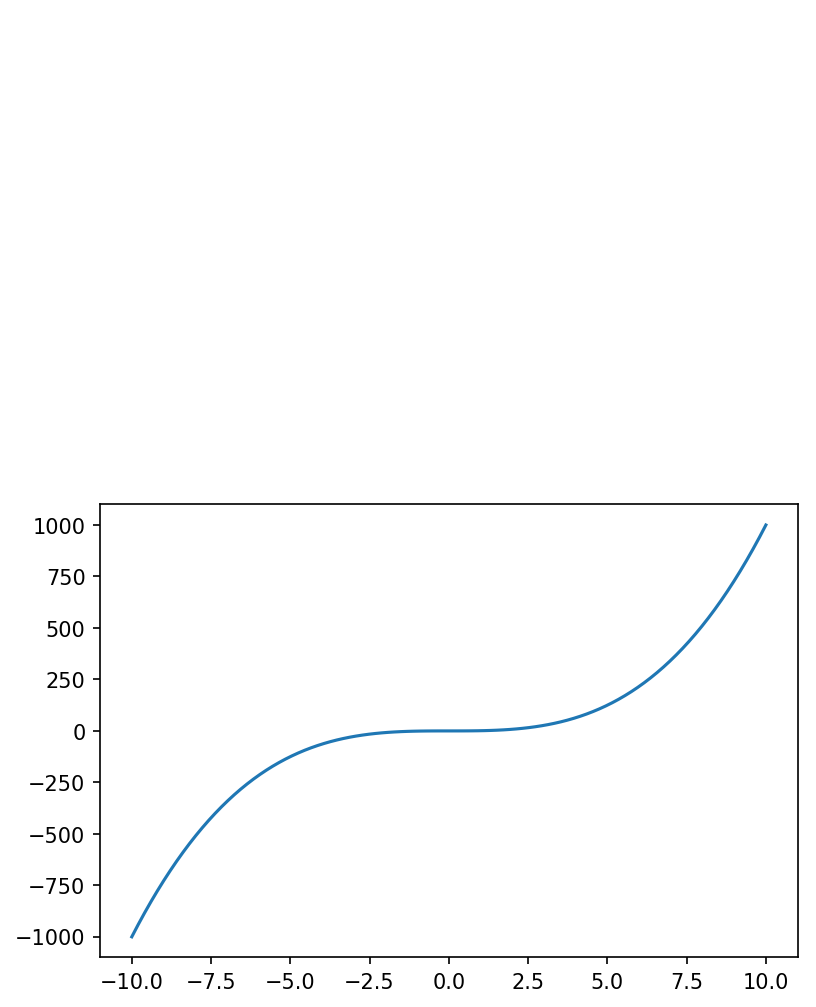

In [9]:
import matplotlib.animation
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.ion()

fig, ax = plt.subplots()
plt.ioff()
x= np.linspace(-10,10,100)
def animate(t):
    ax.cla() # réinitialiser la figure pour ne pas que les courbes se superposent
    ax.plot(x,(x+t/10)**3) # La fonction variant dans le temps (en t)

matplotlib.animation.FuncAnimation(fig, animate, frames=50)
#plt.show()
#plt.plot([np.real(j) for j in psi_t],[np.imag(j) for j in psi_t])

## Question 4
Le programme précédent est maintenant modifié afin d'effectuer les opérations d'algèbre linéaire avec le module numpy.linalg. On observe un certain gain en vitesse de calcul...

In [10]:
from scipy.sparse import diags

A = diags([a2,a1, a2], [-1, 0, 1], shape=(N+1, N+1)).toarray()
B = diags([b2,b1, b2], [-1, 0, 1], shape=(N+1, N+1)).toarray()

## Question 5

*Blabla dé la physica !!*
Le comportement de la fonction d'onde, tel que décrit par l'animation, est...